In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Finding the version of libraries we are using
print("Panda version : {0}".format(pd.__version__))
print("Seaborn version : {0}".format(sns.__version__))
print("Matplotlib version : {0}".format(matplotlib.__version__))
print("Numpy version : {0}".format(np.__version__))

Panda version : 1.2.4
Seaborn version : 0.11.1
Matplotlib version : 3.4.2
Numpy version : 1.20.2


In [3]:
#To accommodate maximum number of colums in Jupyter
pd.options.display.max_columns = 20
sns.set_style('whitegrid')

In [4]:
titanic_train = pd.read_csv('data/train.csv')
titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:>

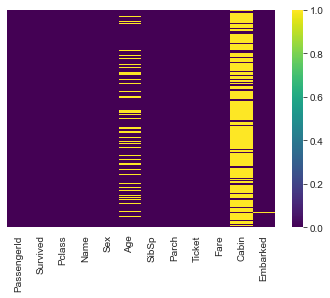

In [5]:
#Check which column has null values
sns.heatmap(titanic_train.isnull(),yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

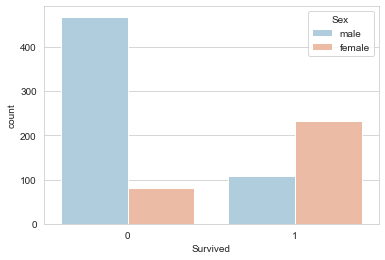

In [6]:
sns.countplot(x= 'Survived',hue ='Sex',data = titanic_train, palette = 'RdBu_r' )

<AxesSubplot:xlabel='Survived', ylabel='count'>

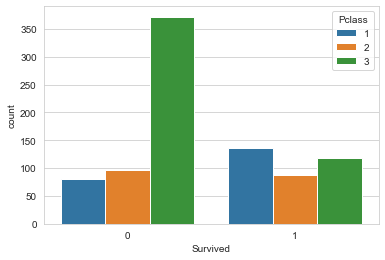

In [7]:
sns.countplot(x= 'Survived',hue ='Pclass',data = titanic_train)

<AxesSubplot:xlabel='Age'>

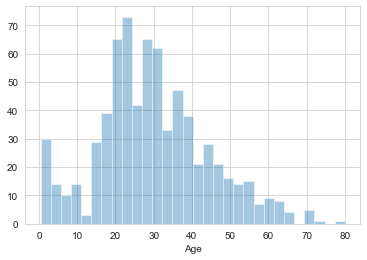

In [8]:
sns.distplot(titanic_train['Age'], kde = False, bins= 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

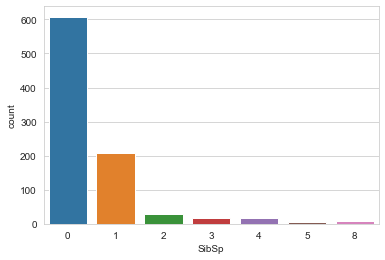

In [9]:
#check sibling count
sns.countplot(x='SibSp',data=titanic_train)


In [10]:
#for interactive EDA
import cufflinks as cf


In [11]:
cf.go_offline()

In [12]:
#titanic_train['Fare'].iplot(kind='hist', bins= 50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

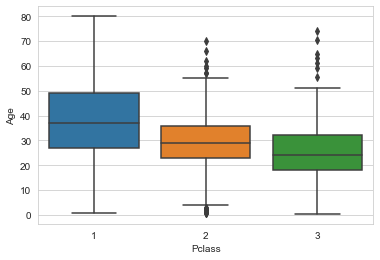

In [13]:
sns.boxplot(x='Pclass' , y = 'Age', data= titanic_train)

In [14]:
def impute_age(cols):
    age = cols[0]
    p_class = cols[1]
    if pd.isnull(age):
        if p_class == 1:
            return 37
        elif p_class == 2:
            return 27
        else:
            return 24
    else:
        return age

In [15]:
titanic_train['Age']   = titanic_train[["Age","Pclass"]].apply(impute_age, axis=1)  


In [16]:
titanic_train = titanic_train.drop('Cabin', axis=1)
titanic_train.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S

In [17]:
titanic_train = titanic_train.dropna()

<AxesSubplot:>

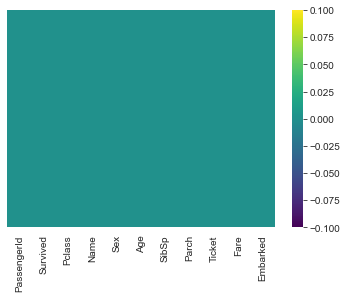

In [18]:
#Check which column has null values
sns.heatmap(titanic_train.isnull(),yticklabels=False, cmap='viridis')

In [19]:
#Convert categorical column
sex = pd.get_dummies(titanic_train['Sex'],drop_first= True)
sex.head()


male
0     1
1     0
2     0
3     0
4     1

In [20]:
embark = pd.get_dummies(titanic_train['Embarked'],drop_first= True)
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [21]:
#concatenate all DataFrames
titanic_train = pd.concat([titanic_train,sex,embark],axis=1)
titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            373450   8.0500        S     1  0  1

In [22]:
titanic_train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)


In [23]:
titanic_train.drop('PassengerId',axis=1, inplace=True)
titanic_train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (891, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
 

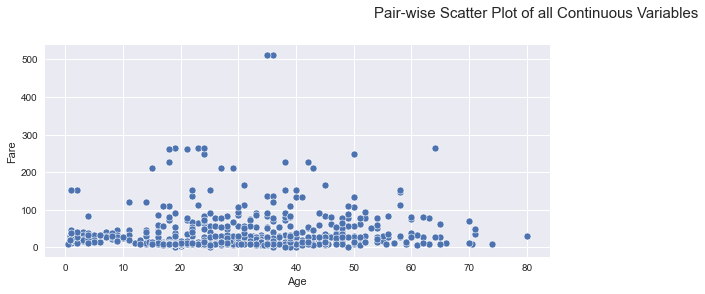

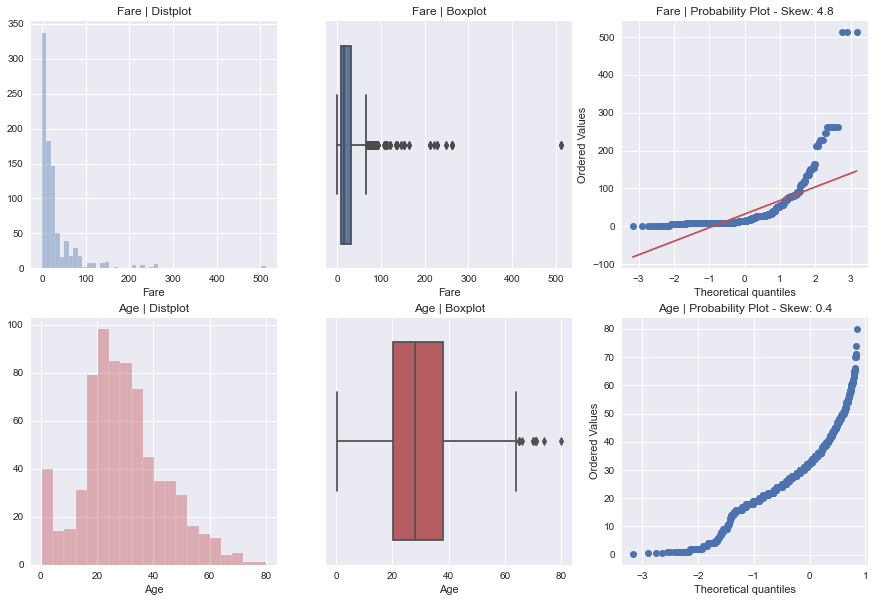

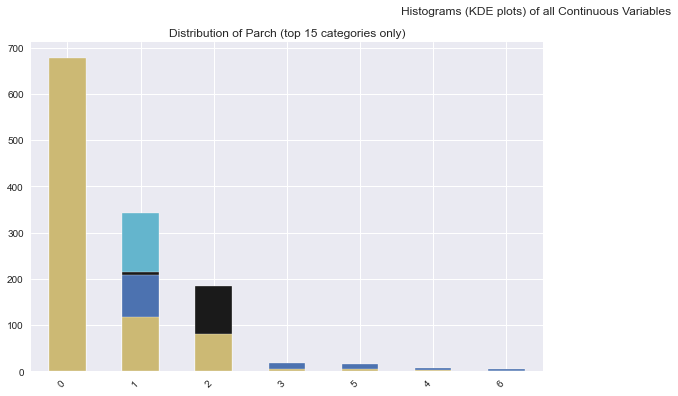

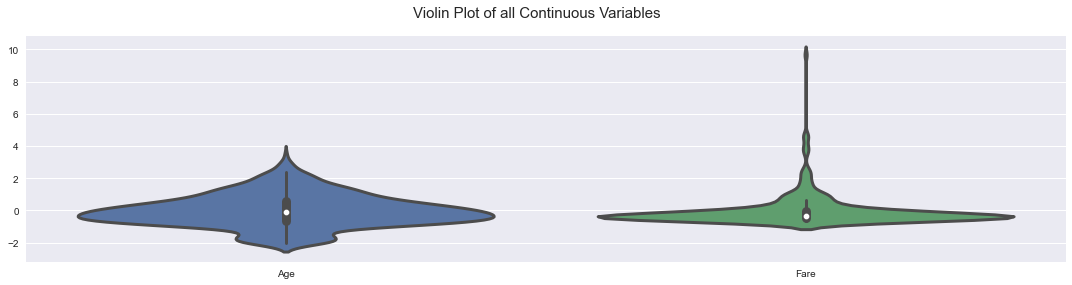

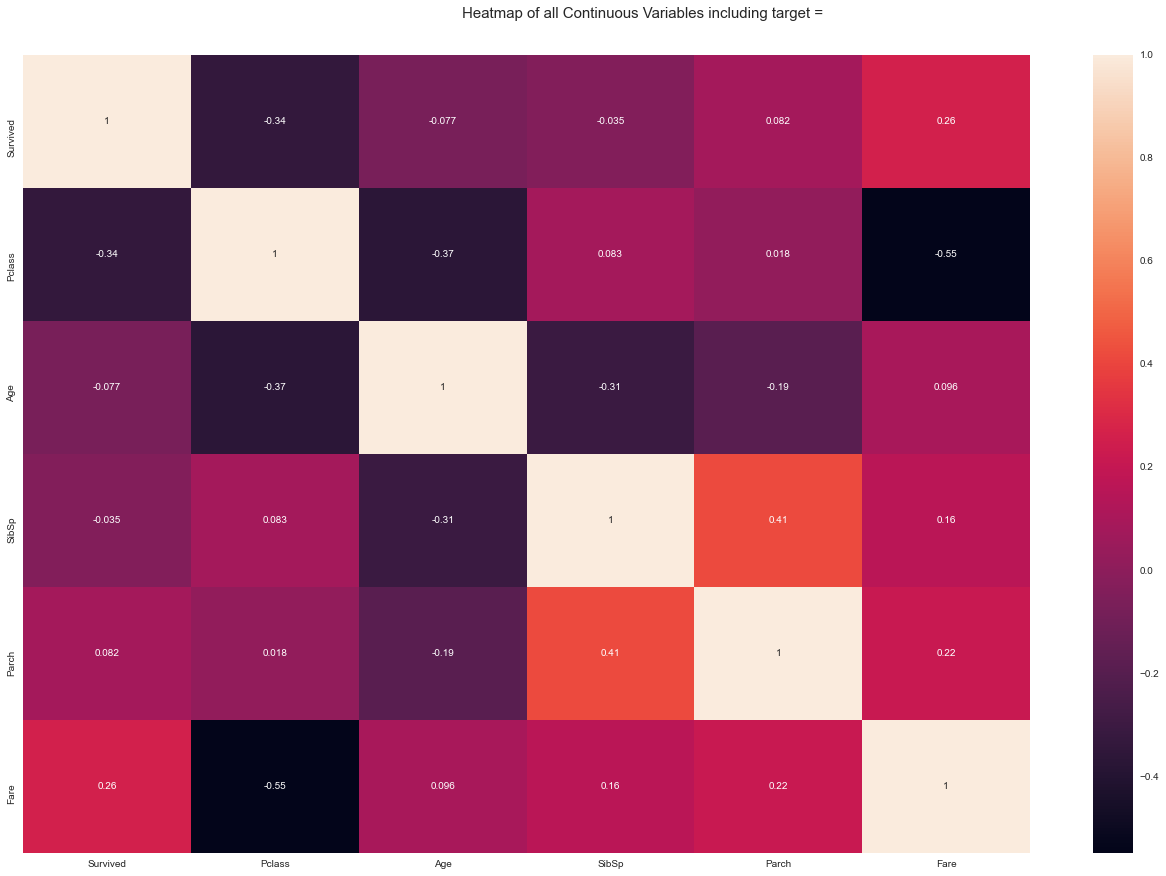

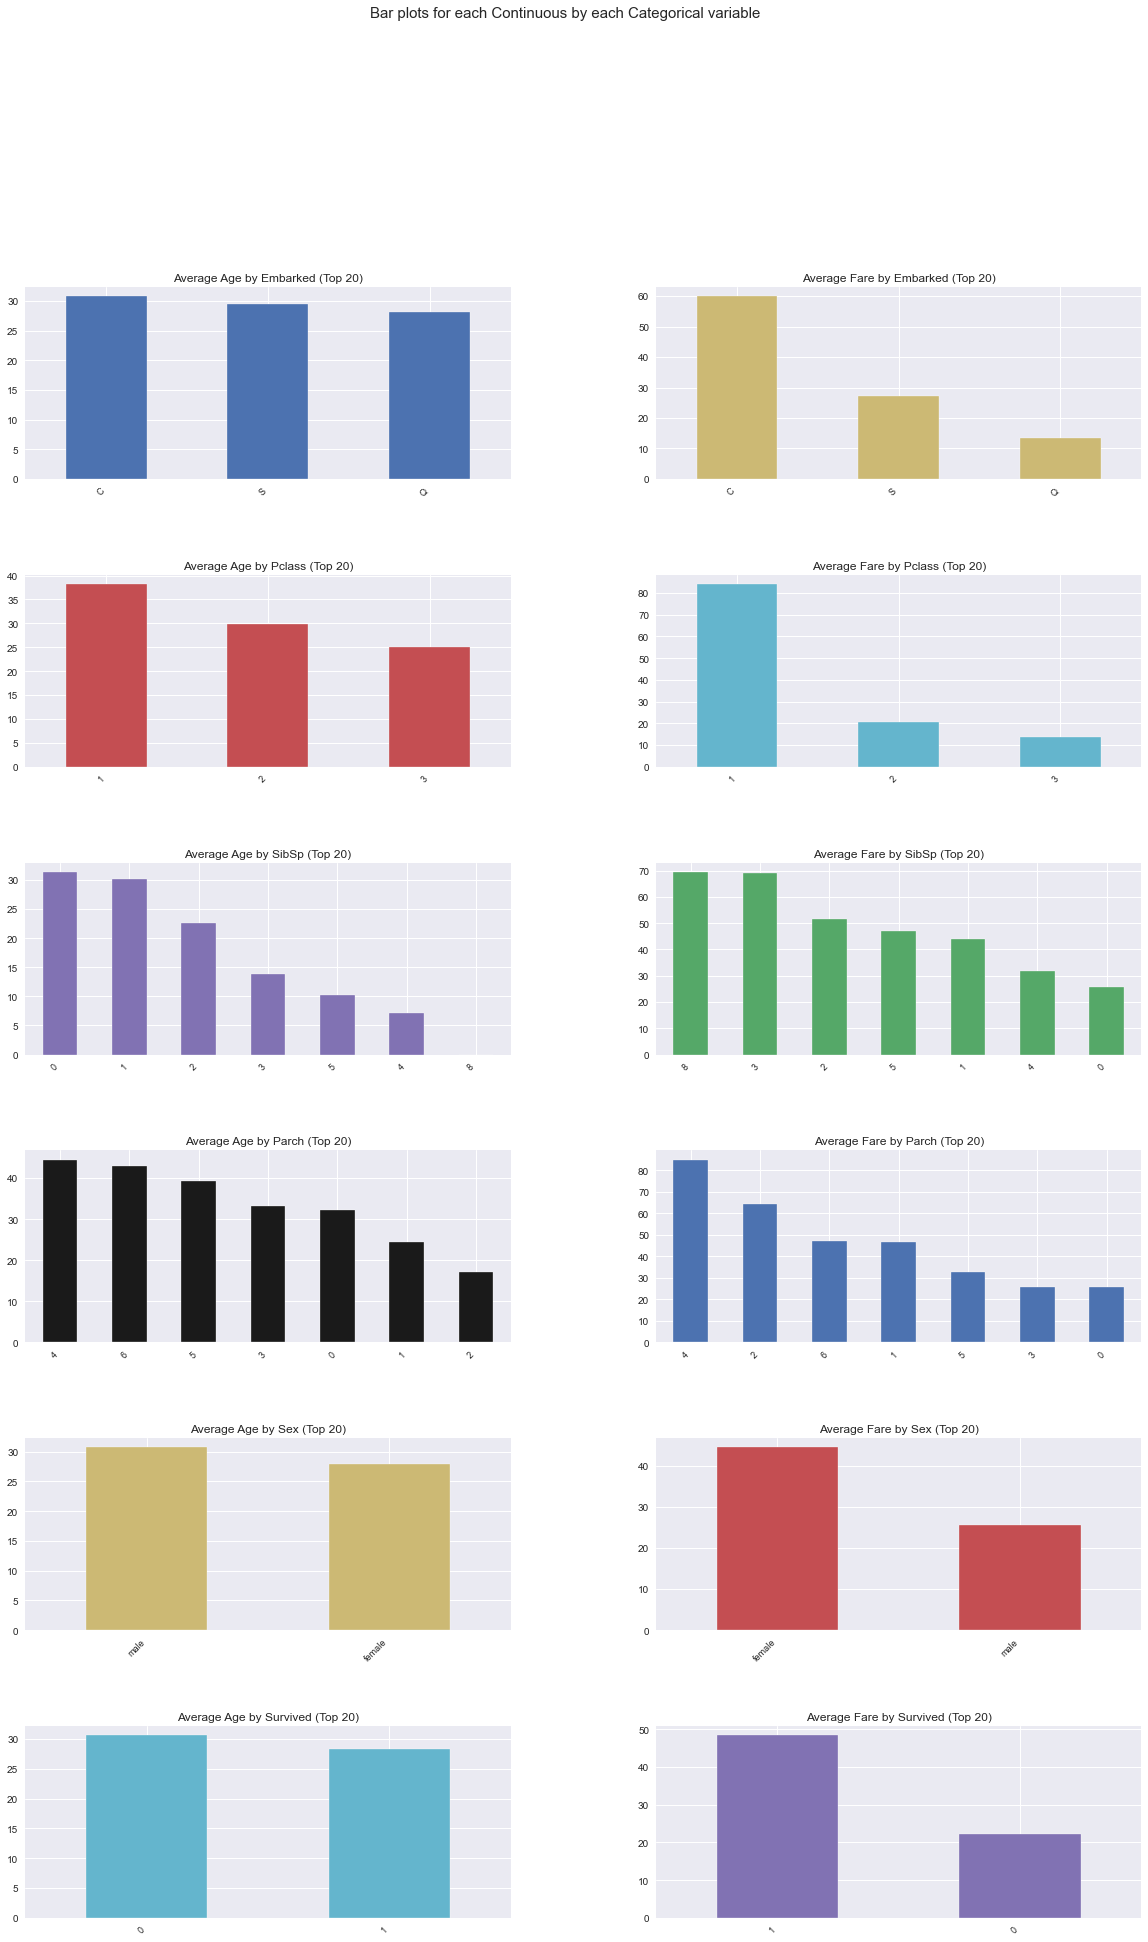

Time to run AutoViz (in seconds) = 3.659

 ###################### VISUALIZATION Completed ########################


In [24]:
titanic_train.head(2)
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('data/titanic_train.csv')

In [25]:
#Create features and lables
X =  titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']
X.head()

Pclass   Age  SibSp  Parch     Fare  male  Q  S
0       3  22.0      1      0   7.2500     1  0  1
1       1  38.0      1      0  71.2833     0  0  0
2       3  26.0      0      0   7.9250     0  0  1
3       1  35.0      1      0  53.1000     0  0  1
4       3  35.0      0      0   8.0500     1  0  1

In [26]:
#traing and testing data split
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 \
                                                   ,random_state=42)

In [29]:
#Model creation
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [32]:
predictions= log_model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.74      0.80      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[90, 19],
       [14, 55]])